FieldNBalance is a program that estimates the N balance and provides N fertilizer recommendations for cultivated crops.
Author: Hamish Brown.
Copyright (c) 2024 The New Zealand Institute for Plant and Food Research Limited

In [1]:
import os 
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Path for current Tests

In [2]:
try: 
    if os.environ["GITHUB_WORKSPACE"] != None:
        root = os.environ["GITHUB_WORKSPACE"]
        inPath = os.path.join(root, "TestComponents", "TestSets", "Residues", "Outputs")
        outPath = os.path.join(root, "TestGraphs", "Outputs") 
        localDayFirst = False
        localDateFormat = '%m/%d/%Y %H:%M:%S'
except:
    localDayFirst = True
    localDateFormat = '%d/%m/%Y %H:%M:%S %p'
    rootfrags = os.path.abspath('Residues.py').split("\\")
    root = ""
    for d in rootfrags:
        if d == "FieldNBalance":
            break
        else:
            root += d + "\\"
    inPath = os.path.join(root,"FieldNBalance","TestComponents", "TestSets", "Residues", "Outputs")
    outPath = os.path.join(root,"FieldNBalance","TestGraphs", "Outputs")  

Get names and results from each test

In [3]:
testFiles = []
tests = []
for file in os.listdir(inPath):
    if file.endswith('.csv'):
        testFiles.append(file)
        tests.append(file.replace(".csv",""))

Pack tests up into dataframe for graphing

In [4]:
Alltests =[]
for t in testFiles[:]:  
    testframe = pd.read_csv(os.path.join(inPath, t),index_col=0,dayfirst=localDayFirst,date_format=localDateFormat)    
    Alltests.append(testframe)   

AllData = pd.concat(Alltests,axis=1,keys=tests)
AllData.sort_index(axis=0,inplace=True)
AllData.index = pd.to_datetime(AllData.index)

Make graph

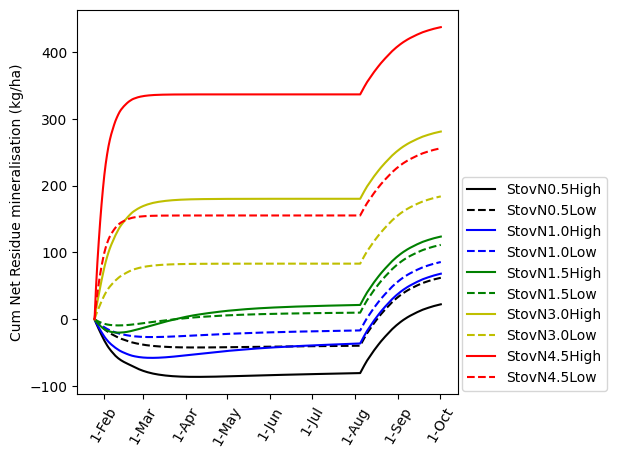

In [5]:
cols = ['k','k','b','b','g','g','y','y','r','r']
lines = ['-','--','-','--','-','--','-','--','-','--',]

Graph = plt.figure()
ax = Graph.add_subplot(1,1,1)
pos = 0
for t in tests:
    plt.plot(AllData.loc[:,(t,'ResidueN')].cumsum(),lines[pos],color=cols[pos],label = t)
    pos +=1
plt.legend(loc=(1.01,0.01))
plt.ylabel('Cum Net Residue mineralisation (kg/ha)')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
Graph.tight_layout(pad=1.5)
plt.savefig(os.path.join(outPath, 'Residues.png'))

In [6]:
AllData

StovN0.5High                                            \
                    SoilMineralN   UptakeN  ResidueN   SoilOMN FertiliserN   
Date                                                                         
2023-01-25 12:00:00     0.000000  0.093179  0.000000  1.029521         0.0   
2023-01-26 12:00:00    45.631132  0.000000 -5.440566  1.071698         0.0   
2023-01-27 12:00:00    41.759529  0.000000 -4.842683  0.971080         0.0   
2023-01-28 12:00:00    38.178575  0.000000 -4.460410  0.879456         0.0   
2023-01-29 12:00:00    34.585790  0.000000 -4.467670  0.874884         0.0   
...                          ...       ...       ...       ...         ...   
2023-09-27 12:00:00    47.039085  6.144787  0.569666  0.533545         0.0   
2023-09-28 12:00:00    42.948474  5.122134  0.529040  0.502482         0.0   
2023-09-29 12:00:00    39.639283  4.294836  0.502205  0.483441         0.0   
2023-09-30 12:00:00    37.012947  3.638252  0.506093  0.505824         0.0   
2023-10-01 12:00:00    34.892382  3.108111  0.486840  0.500706         0.0   

                                                                      ...  \
                          CropN    ProductN LostN      RSWC Drainage  ...   
Date                                                                  ...   
2023-01-25 12:00:00  124.410000   56.550000   0.0  0.900000      0.0  ...   
2023-01-26 12:00:00    0.000000    0.000000   0.0  0.902273      0.0  ...   
2023-01-27 12:00:00    0.000000    0.000000   0.0  0.880155      0.0  ...   
2023-01-28 12:00:00    0.000000    0.000000   0.0  0.831053      0.0  ...   
2023-01-29 12:00:00    0.000000    0.000000   0.0  0.781559      0.0  ...   
...                         ...         ...   ...       ...      ...  ...   
2023-09-27 12:00:00  100.678337  102.748807   0.0  0.879539      0.0  ...   
2023-09-28 12:00:00  105.800471  112.813731   0.0  0.860449      0.0  ...   
2023-09-29 12:00:00  110.095307  122.610808   0.0  0.834692      0.0  ...   
2023-09-30 12:00:00  113.733560  132.797884   0.0  0.807269      0.0  ...   
2023-10-01 12:00:00  116.841671  142.500000   0.0  0.786209      0.0  ...   

                    StovN4.5Low                                            \
                        SoilOMN FertiliserN       CropN    ProductN LostN   
Date                                                                        
2023-01-25 12:00:00    1.029521         0.0  516.780000  234.900000   0.0   
2023-01-26 12:00:00    1.071698         0.0    0.000000    0.000000   0.0   
2023-01-27 12:00:00    0.971080         0.0    0.000000    0.000000   0.0   
2023-01-28 12:00:00    0.879456         0.0    0.000000    0.000000   0.0   
2023-01-29 12:00:00    0.874884         0.0    0.000000    0.000000   0.0   
...                         ...         ...         ...         ...   ...   
2023-09-27 12:00:00    0.533545         0.0   99.460183  102.748807   0.0   
2023-09-28 12:00:00    0.502482         0.0  104.313408  112.813731   0.0   
2023-09-29 12:00:00    0.483441         0.0  108.386138  122.610808   0.0   
2023-09-30 12:00:00    0.505824         0.0  111.839383  132.797884   0.0   
2023-10-01 12:00:00    0.500706         0.0  114.792144  142.500000   0.0   

                                                                           
                         RSWC Drainage Irrigation Green cover     NDemand  
Date                                                                       
2023-01-25 12:00:00  0.900000      0.0        0.0    0.003140  516.780000  
2023-01-26 12:00:00  0.902273      0.0        0.0    0.000000    0.000000  
2023-01-27 12:00:00  0.880155      0.0        0.0    0.000000    0.000000  
2023-01-28 12:00:00  0.831053      0.0        0.0    0.000000    0.000000  
2023-01-29 12:00:00  0.781559      0.0        0.0    0.000000    0.000000  
...                       ...      ...        ...         ...         ...  
2023-09-27 12:00:00  0.879539      0.0        0.0    0.999473  111.040816  
2023-09-2